Problem Statement

The Client

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

Project delivery:

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

LOAD DATASETS

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from datetime import datetime

In [50]:
#read dataframes
cab_df = pd.read_csv('G:/My Drive/datasets/Cab_Data.csv')
city_df = pd.read_csv('G:/My Drive/datasets/City.csv')
customer_df = pd.read_csv('G:/My Drive/datasets/Customer_ID.csv')
transaction_df = pd.read_csv('G:/My Drive/datasets/Transaction_ID.csv')

DATA PREPROCESSING

CAB

In [51]:
#view the first 5 columns
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [52]:
#view shape of the df
cab_df.shape

(359392, 7)

In [53]:
#view the dtypes of the columns
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [54]:
#summary stats of the df
cab_df.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


CITY

In [55]:
#preview df
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [56]:
#view shape of df
city_df.shape

(20, 3)

In [57]:
#view dtypes
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [58]:
#summary stats of the df
city_df.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


CUSTOMER

In [59]:
#preview df
customer_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [60]:
#view shape of df
customer_df.shape

(49171, 4)

In [61]:
#view dtypes of columns
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [62]:
#summary stats of df
customer_df.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


TRANSACTION

In [63]:
#preview df
transaction_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [64]:
#view shape
transaction_df.shape

(440098, 3)

In [65]:
#view dtypes
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [66]:
#summary stats
transaction_df.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [67]:
#merge all dfs
df = customer_df.merge(transaction_df, on='Customer ID').merge(cab_df, on='Transaction ID').merge(city_df, on='City')
df.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,29290,Male,28,10813,10000011,Card,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701"
1,29290,Male,28,10813,10351127,Cash,21-07-2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701"
2,29290,Male,28,10813,10412921,Card,23-11-2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701"
3,27703,Male,27,9237,10000012,Card,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701"
4,27703,Male,27,9237,10320494,Card,21-04-2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701"


EXPLORATORY DATA ANALYSIS

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Customer ID         359392 non-null  int64  
 1   Gender              359392 non-null  object 
 2   Age                 359392 non-null  int64  
 3   Income (USD/Month)  359392 non-null  int64  
 4   Transaction ID      359392 non-null  int64  
 5   Payment_Mode        359392 non-null  object 
 6   Date of Travel      359392 non-null  object 
 7   Company             359392 non-null  object 
 8   City                359392 non-null  object 
 9   KM Travelled        359392 non-null  float64
 10  Price Charged       359392 non-null  float64
 11  Cost of Trip        359392 non-null  float64
 12  Population          359392 non-null  object 
 13  Users               359392 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 41.1+ MB


In [69]:
#check for missing values
df.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
Transaction ID        0
Payment_Mode          0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Population            0
Users                 0
dtype: int64

Exploring Categorical Features

Company

In [70]:
#check unique companies
df["Company"].nunique()

2

In [71]:
#check value counts 
df["Company"].value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

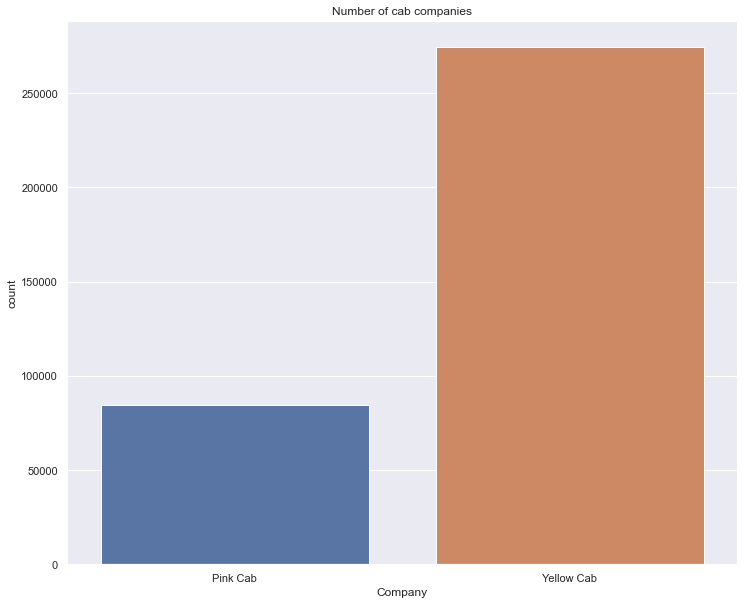

In [72]:
#count plot for company
sns.countplot(x=df["Company"]).set(title="Number of cab companies");

CITY

In [73]:
#unique values
df["City"].nunique()

19

In [74]:
#check cities the companies operate in
df["City"].value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

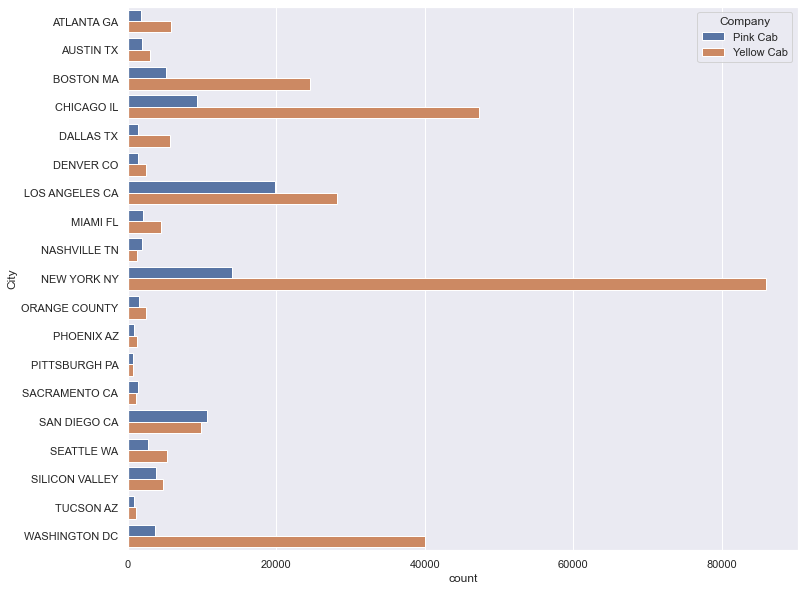

In [75]:
#count plot for which cab company operates more in which city
sns.countplot(data = df, y= "City",hue="Company")
sns.set(rc={'figure.figsize':(15,10)});

Silicon valley and Orange county dont have states so we are going to replace

In [76]:
#replace silicon valley and orange county to add their states
df["City"] = df["City"].replace(["SILICON VALLEY"],"SILICON VALLEY CA")
df["City"] = df["City"].replace(["ORANGE COUNTY"],"ORANGE COUNTY CA")
df["City"].value_counts()

NEW YORK NY          99885
CHICAGO IL           56625
LOS ANGELES CA       48033
WASHINGTON DC        43737
BOSTON MA            29692
SAN DIEGO CA         20488
SILICON VALLEY CA     8519
SEATTLE WA            7997
ATLANTA GA            7557
DALLAS TX             7017
MIAMI FL              6454
AUSTIN TX             4896
ORANGE COUNTY CA      3982
DENVER CO             3825
NASHVILLE TN          3010
SACRAMENTO CA         2367
PHOENIX AZ            2064
TUCSON AZ             1931
PITTSBURGH PA         1313
Name: City, dtype: int64

In [77]:
#split the "city" column and create a new column "state"

US_States = [
    "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
    "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
    "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
    "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
    "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"
]

state = []
city = []

for i in range(len(df)):
    if df["City"][i].split()[~0] in US_States:
        city.append(df["City"][i].split(f' {df["City"][i].split()[~0]}')[0])
        state.append(df["City"][i].split()[~0])
    else:
        city.append(df["City"][i])
        state.append(np.nan)
        
        
#load outputs to respective columns and view df
df["State"] = state
df["City"] = city
df.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,State
0,29290,Male,28,10813,10000011,Card,08-01-2016,Pink Cab,ATLANTA,30.45,370.95,313.6350,"814,885","24,701",GA
1,29290,Male,28,10813,10351127,Cash,21-07-2018,Yellow Cab,ATLANTA,26.19,598.70,317.4228,"814,885","24,701",GA
2,29290,Male,28,10813,10412921,Card,23-11-2018,Yellow Cab,ATLANTA,42.55,792.05,597.4020,"814,885","24,701",GA
3,27703,Male,27,9237,10000012,Card,06-01-2016,Pink Cab,ATLANTA,28.62,358.52,334.8540,"814,885","24,701",GA
4,27703,Male,27,9237,10320494,Card,21-04-2018,Yellow Cab,ATLANTA,36.38,721.10,467.1192,"814,885","24,701",GA


In [78]:
#view info for the new df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Customer ID         359392 non-null  int64  
 1   Gender              359392 non-null  object 
 2   Age                 359392 non-null  int64  
 3   Income (USD/Month)  359392 non-null  int64  
 4   Transaction ID      359392 non-null  int64  
 5   Payment_Mode        359392 non-null  object 
 6   Date of Travel      359392 non-null  object 
 7   Company             359392 non-null  object 
 8   City                359392 non-null  object 
 9   KM Travelled        359392 non-null  float64
 10  Price Charged       359392 non-null  float64
 11  Cost of Trip        359392 non-null  float64
 12  Population          359392 non-null  object 
 13  Users               359392 non-null  object 
 14  State               359392 non-null  object 
dtypes: float64(3), int64(4), object(8)

In [79]:
df["State"].nunique()

13

In [80]:
df["State"].value_counts()

NY    99885
CA    83389
IL    56625
DC    43737
MA    29692
TX    11913
WA     7997
GA     7557
FL     6454
AZ     3995
CO     3825
TN     3010
PA     1313
Name: State, dtype: int64

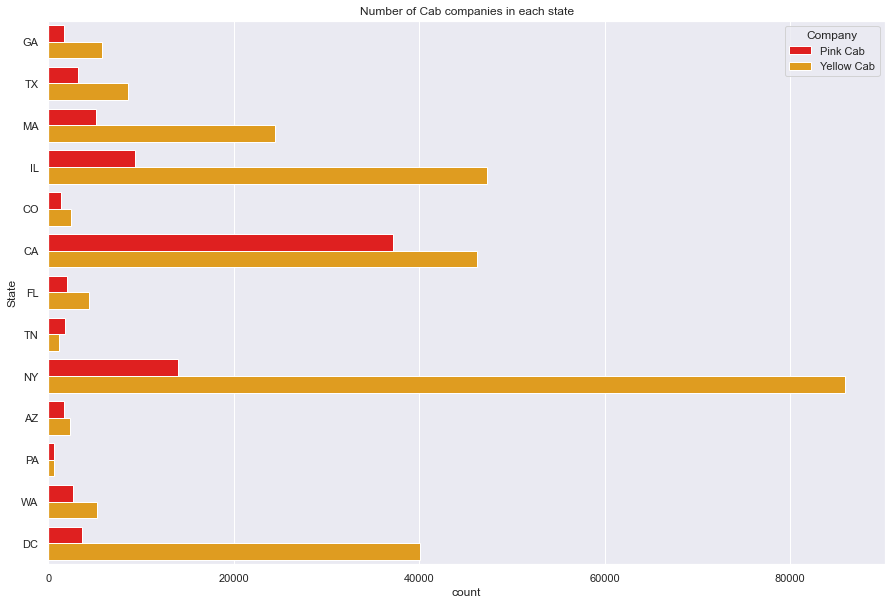

In [81]:
#count plot for which cab company operates more in which state
color = ["red","orange"]
sns.set_palette(sns.color_palette(color))
sns.countplot(data = df, y= "State",hue="Company").set(title="Number of Cab companies in each state")
sns.set(rc={'figure.figsize':(15,10)});

Gender

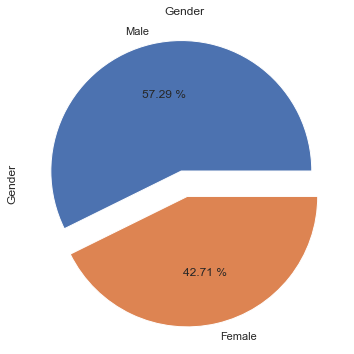

In [82]:
#plot gender pie chart
plt = df["Gender"].value_counts().plot(kind="pie", autopct='%.2f %%',figsize=(6, 6), title="Gender", explode = (0.1, 0.1))

- Most of the cab users are male with a percentage of 57.29

In [83]:
#transform population and users from string to float
df["Population"] = (df["Population"]
                    .str.replace(",",  "")
                    .apply(np.int64)
                    )


df["Users"] = (df["Users"]
               .str.replace(",",  "")
               .apply(np.int64)
                )

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Customer ID         359392 non-null  int64  
 1   Gender              359392 non-null  object 
 2   Age                 359392 non-null  int64  
 3   Income (USD/Month)  359392 non-null  int64  
 4   Transaction ID      359392 non-null  int64  
 5   Payment_Mode        359392 non-null  object 
 6   Date of Travel      359392 non-null  object 
 7   Company             359392 non-null  object 
 8   City                359392 non-null  object 
 9   KM Travelled        359392 non-null  float64
 10  Price Charged       359392 non-null  float64
 11  Cost of Trip        359392 non-null  float64
 12  Population          359392 non-null  int64  
 13  Users               359392 non-null  int64  
 14  State               359392 non-null  object 
dtypes: float64(3), int64(6), object(6)

In [84]:
#summary stats 
df.describe()

,Customer ID,Age,Income (USD/Month),Transaction ID,KM Travelled,Price Charged,Cost of Trip,Population,Users
count,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000
mean,19191.652115,35.336705,15048.822937,1.022076e+07,22.567254,423.443311,286.190113,3.132198e+06,158365.582267
std,21012.412463,12.594234,7969.409482,1.268058e+05,12.233526,274.378911,157.993661,3.315194e+06,100850.051020
min,1.000000,18.000000,2000.000000,1.000001e+07,1.900000,15.600000,19.000000,2.489680e+05,3643.000000
25%,2705.000000,25.000000,8424.000000,1.011081e+07,12.000000,206.437500,151.200000,6.712380e+05,80021.000000
50%,7459.000000,33.000000,14685.000000,1.022104e+07,22.440000,386.360000,282.480000,1.595037e+06,144132.000000
75%,36078.000000,42.000000,21035.000000,1.033094e+07,32.960000,583.660000,413.683200,8.405837e+06,302149.000000
max,60000.000000,65.000000,35000.000000,1.044011e+07,48.000000,2048.030000,691.200000,8.405837e+06,302149.000000


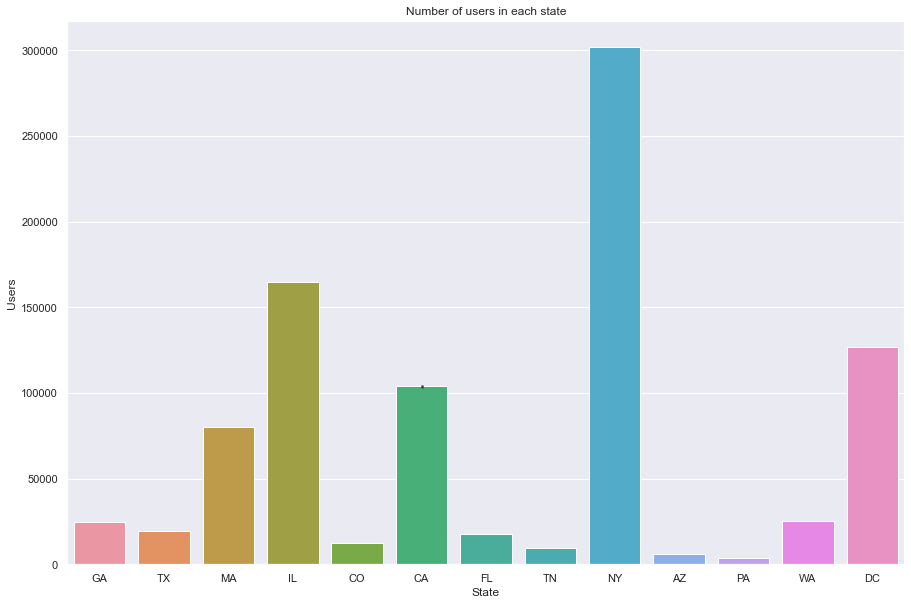

In [85]:
#bar plot for users in each state 
sns.barplot(data=df, y="Users", x="State").set(title="Number of users in each state")
sns.set(rc={'figure.figsize':(12,10)});

In [86]:
#create year columns
df["Year"] = df["Date of Travel"].str.split("-", expand=True)[2]
df["Year"].head()

0    2016
1    2018
2    2018
3    2016
4    2018
Name: Year, dtype: object

#Get number of users in both cab companies yearly
users_by_year = df.groupby(["Year", "Company"])["Users"].sum().apply(np.int64)
users_by_year

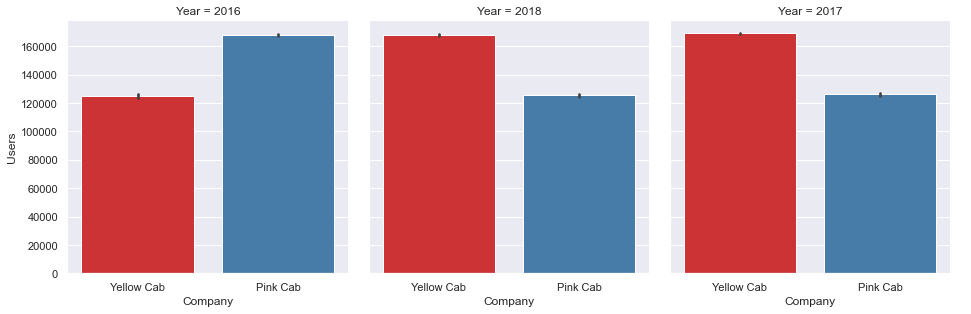

In [87]:
#barplot for number of users in each company yearly
grid = sns.FacetGrid(df, col="Year")
grid.map_dataframe(sns.barplot,  x="Company", y="Users", palette='Set1')
grid.fig.set_size_inches(14,6)
grid.fig.subplots_adjust(top=.8)
grid.add_legend();

- Yellow cab company has more users than the pink cab company. 
- The number of users of the yellow cab increased from 12,000 in 2016 to 16,000 in 2017 and retained the same number in 2018.
- The pink cab company had fewer users

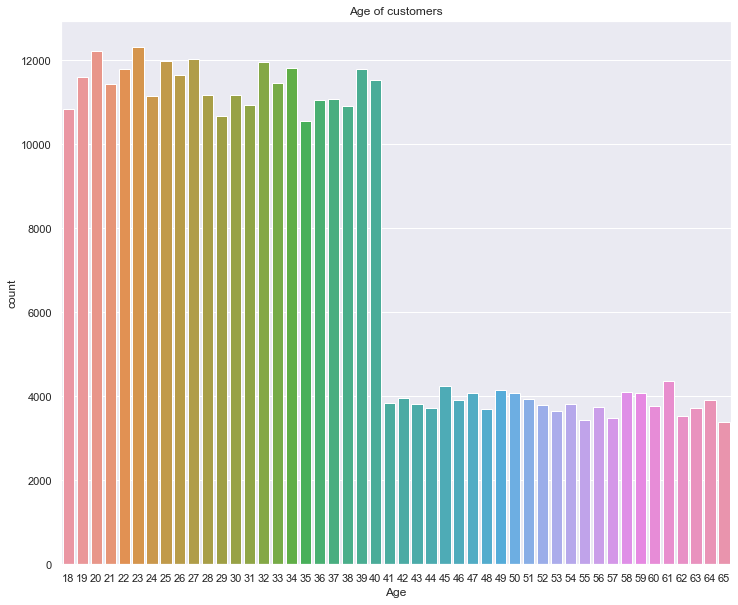

In [88]:
#age of customers
sns.countplot(x=df["Age"]).set(title="Age of customers");

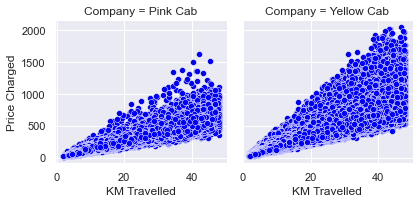

In [89]:
#scatterplot for price vs km travelled
g = sns.FacetGrid(df, col="Company")
g.map_dataframe(sns.scatterplot,  x="KM Travelled", y="Price Charged", color="blue")
grid.set(xlim=(0, 55), ylim=(0, 2250));
grid.fig.set_size_inches(15,8)
grid.fig.subplots_adjust(top=.8)
grid.add_legend();


In [90]:
#calculate profit and profit rate
df['Profit'] = df['Price Charged'] - df['Cost of Trip']
df['Profit Rate'] = ((df['Price Charged'] - df['Cost of Trip'])/df['Cost of Trip'])*100

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Customer ID         359392 non-null  int64  
 1   Gender              359392 non-null  object 
 2   Age                 359392 non-null  int64  
 3   Income (USD/Month)  359392 non-null  int64  
 4   Transaction ID      359392 non-null  int64  
 5   Payment_Mode        359392 non-null  object 
 6   Date of Travel      359392 non-null  object 
 7   Company             359392 non-null  object 
 8   City                359392 non-null  object 
 9   KM Travelled        359392 non-null  float64
 10  Price Charged       359392 non-null  float64
 11  Cost of Trip        359392 non-null  float64
 12  Population          359392 non-null  int64  
 13  Users               359392 non-null  int64  
 14  State               359392 non-null  object 
 15  Year                359392 non-nul

<AxesSubplot:xlabel='Profit Rate', ylabel='Count'>

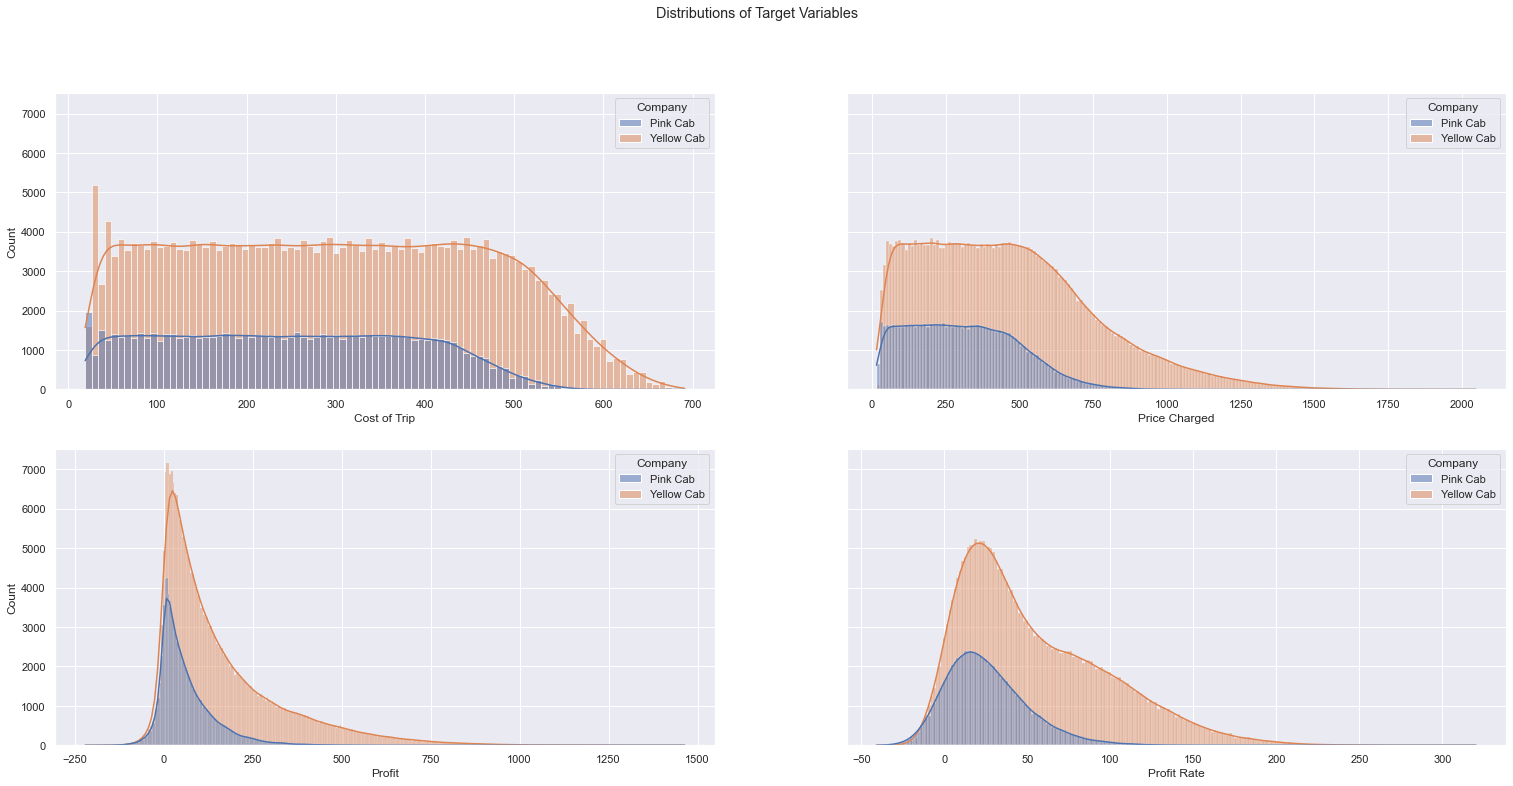

In [93]:
fig,axes = plt.subplots(2, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')
sns.histplot(ax=axes[0,0], data=df , x='Cost of Trip' , kde = True , hue="Company")
sns.histplot(ax=axes[0,1], data=df , x='Price Charged' , kde = True , hue="Company")
sns.histplot(ax=axes[1,0], data=df , x='Profit' , kde = True , hue="Company") 
sns.histplot(ax=axes[1,1], data=df , x='Profit Rate' , kde = True , hue="Company")

The yellow cab company has a higher profite rate than the pink cab company